# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
optimizer_dic={}
optimizer_item = ["SGD","RMSprop","AdaGrad","Adam"]
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95


Optimizer = SGD
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [============

50000/50000 [==============================] - 3s 54us/step - loss: 1.3701 - acc: 0.5200 - val_loss: 1.4302 - val_acc: 0.4917
Epoch 15/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.3545 - acc: 0.5260 - val_loss: 1.4110 - val_acc: 0.4945
Epoch 16/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.3331 - acc: 0.5329 - val_loss: 1.4011 - val_acc: 0.4969
Epoch 17/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.3139 - acc: 0.5392 - val_loss: 1.4047 - val_acc: 0.4965
Epoch 18/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.2965 - acc: 0.5460 - val_loss: 1.4237 - val_acc: 0.4955
Epoch 19/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.2798 - acc: 0.5530 - val_loss: 1.3874 - val_acc: 0.5008
Epoch 20/30
50000/50000 [==============================] - 3s 55us/step - loss: 1.2645 - acc: 0.5556 - val_loss: 1.3711 - val_acc: 0.5117
Epoch 21/30
50000/50000 [=====================

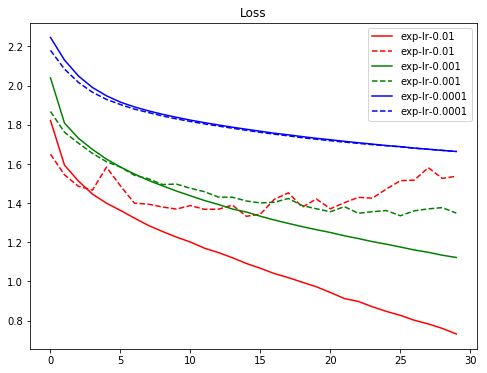

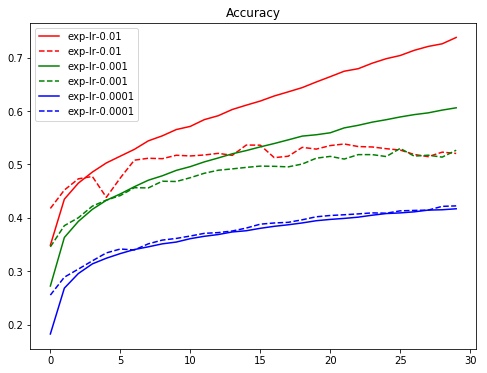

Optimizer = RMSprop
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [========

50000/50000 [==============================] - 3s 57us/step - loss: 1.3654 - acc: 0.5115 - val_loss: 1.6212 - val_acc: 0.4344
Epoch 15/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.3493 - acc: 0.5159 - val_loss: 1.4721 - val_acc: 0.4881
Epoch 16/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.3166 - acc: 0.5315 - val_loss: 1.7512 - val_acc: 0.4002
Epoch 17/30
50000/50000 [==============================] - 3s 57us/step - loss: 1.2989 - acc: 0.5373 - val_loss: 1.5377 - val_acc: 0.4685
Epoch 18/30
50000/50000 [==============================] - 3s 59us/step - loss: 1.2751 - acc: 0.5435 - val_loss: 1.6085 - val_acc: 0.4470
Epoch 19/30
50000/50000 [==============================] - 3s 60us/step - loss: 1.2538 - acc: 0.5533 - val_loss: 1.6003 - val_acc: 0.4479
Epoch 20/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.2336 - acc: 0.5581 - val_loss: 1.6287 - val_acc: 0.4496
Epoch 21/30
50000/50000 [=====================

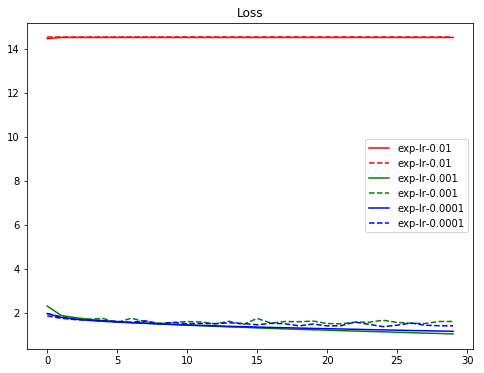

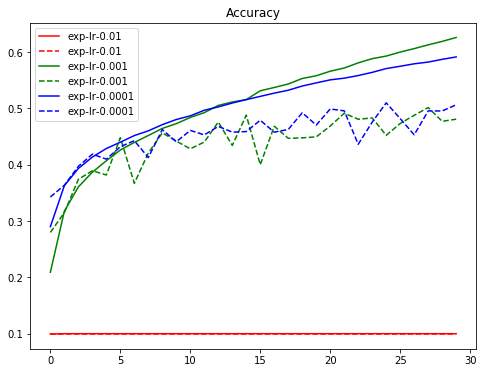

Optimizer = AdaGrad
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [========

50000/50000 [==============================] - 3s 57us/step - loss: 1.4871 - acc: 0.4796 - val_loss: 1.5399 - val_acc: 0.4543
Epoch 15/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.4747 - acc: 0.4846 - val_loss: 1.5214 - val_acc: 0.4595
Epoch 16/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.4637 - acc: 0.4891 - val_loss: 1.4978 - val_acc: 0.4731
Epoch 17/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.4543 - acc: 0.4913 - val_loss: 1.4956 - val_acc: 0.4689
Epoch 18/30
50000/50000 [==============================] - 3s 57us/step - loss: 1.4451 - acc: 0.4961 - val_loss: 1.5141 - val_acc: 0.4681
Epoch 19/30
50000/50000 [==============================] - 3s 56us/step - loss: 1.4361 - acc: 0.5001 - val_loss: 1.5345 - val_acc: 0.4560
Epoch 20/30
50000/50000 [==============================] - 3s 57us/step - loss: 1.4289 - acc: 0.5025 - val_loss: 1.4769 - val_acc: 0.4821
Epoch 21/30
50000/50000 [=====================

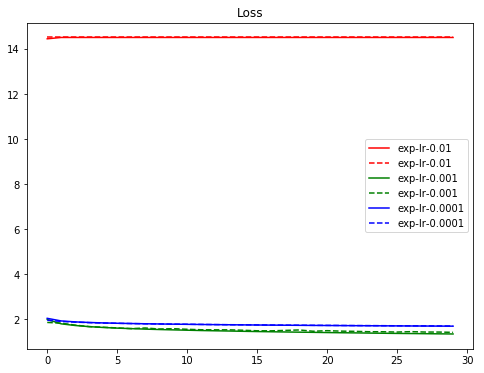

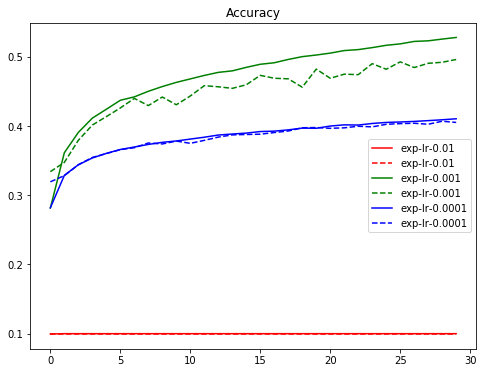

Optimizer = Adam
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [===========

50000/50000 [==============================] - 3s 58us/step - loss: 1.2601 - acc: 0.5538 - val_loss: 1.4604 - val_acc: 0.4898
Epoch 15/30
50000/50000 [==============================] - 3s 59us/step - loss: 1.2403 - acc: 0.5585 - val_loss: 1.4078 - val_acc: 0.5070
Epoch 16/30
50000/50000 [==============================] - 3s 59us/step - loss: 1.2089 - acc: 0.5709 - val_loss: 1.3956 - val_acc: 0.5049
Epoch 17/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.1865 - acc: 0.5774 - val_loss: 1.3729 - val_acc: 0.5203
Epoch 18/30
50000/50000 [==============================] - 3s 58us/step - loss: 1.1709 - acc: 0.5835 - val_loss: 1.3838 - val_acc: 0.5130
Epoch 19/30
50000/50000 [==============================] - 3s 61us/step - loss: 1.1533 - acc: 0.5907 - val_loss: 1.3904 - val_acc: 0.5163
Epoch 20/30
50000/50000 [==============================] - 3s 62us/step - loss: 1.1329 - acc: 0.5971 - val_loss: 1.3542 - val_acc: 0.5238
Epoch 21/30
50000/50000 [=====================

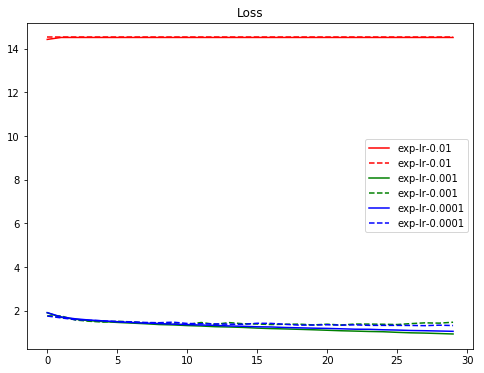

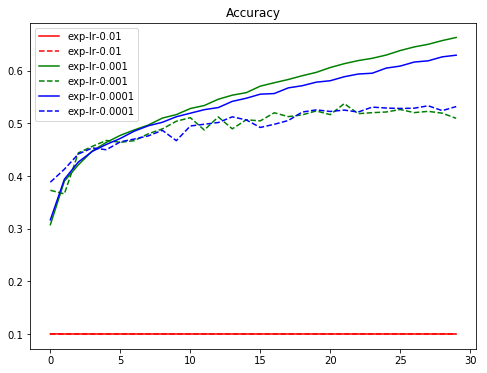

In [11]:
#results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料

使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for optimizer_id in optimizer_item:
    results = {}
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Optimizer = %s" % (optimizer_id))
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        optimizer_dic['SGD'] = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        optimizer_dic['RMSprop'] = keras.optimizers.RMSprop(lr=lr)
        optimizer_dic['AdaGrad'] = keras.optimizers.Adagrad(lr=lr)
        optimizer_dic['Adam'] = keras.optimizers.Adam(lr=lr)
        optimizer=optimizer_dic[optimizer_id]
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    import matplotlib.pyplot as plt
    %matplotlib inline
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()